<a href="https://colab.research.google.com/github/tuba89/bank_marketing_deposit/blob/main/Bank_deposit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense


In [96]:
path = "/content/drive/MyDrive/bank.csv"

In [97]:
bank = pd.read_csv(path)

# Initial analysis and visualization

In [98]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [99]:
bank.shape

(11162, 17)

In [100]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


#Description of the dataset:

0. age: numeric.
1. job: categorical: ('admin','bluecollar', 'entrepreneur','housemaid','management', 'retired', 'selfemployed', 'services', 'student', 'technician', 'unemployed',' unknown')
2. marital: categorical: ('divorced', 'married', 'single', 'unknown')
* note: 'divorced' means divorced or widowed
3. education: categorical: (primary, secondary, tertiary and unknown)
4. default: has credit in default ? (categorical: 'no', 'yes', 'unknown')
5. balance: Balance of the individual.( numeric: deposit amount)
6. housing: has housing loan ? (categorical: 'no', 'yes', 'unknown')
7. loan: has personal loan ? (categorical: 'no', 'yes', 'unknown')
8. contact: contact communication type (categorical: 'cellular', 'telephone')
9. day: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
10. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
11. duration: last contact duration, in seconds (numeric). 
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric)
* note: website tells that 999 means client was not previously contacted, but for this dataset, the value is -1
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure',  'nonexistent',  'success')

16. `deposit`: the target, has the client subscribed a term deposit ? 
(binary: 'yes', 'no') 



In [101]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

* Good for us there's no null values

In [102]:
bank['deposit'].value_counts(normalize=True)*100

no     52.616019
yes    47.383981
Name: deposit, dtype: float64

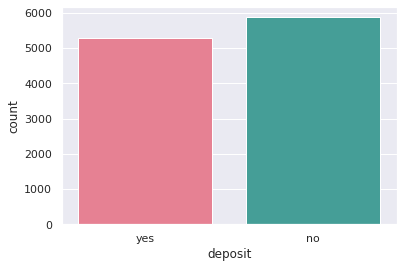

In [103]:
sns.countplot(data=bank, x='deposit', palette="husl")
pass

#### There's about $47$% clients who have made a deposit, and about $52$% who haven't from approximatively 11k person. not too bad not an imbalanced dataset 

# Categorical Features analysis

In [104]:
categorical_features= [feature for feature in bank.columns 
                       if ((bank[feature].dtypes=='O') 
                       & (feature not in ['deposit']))]
# categorical_features

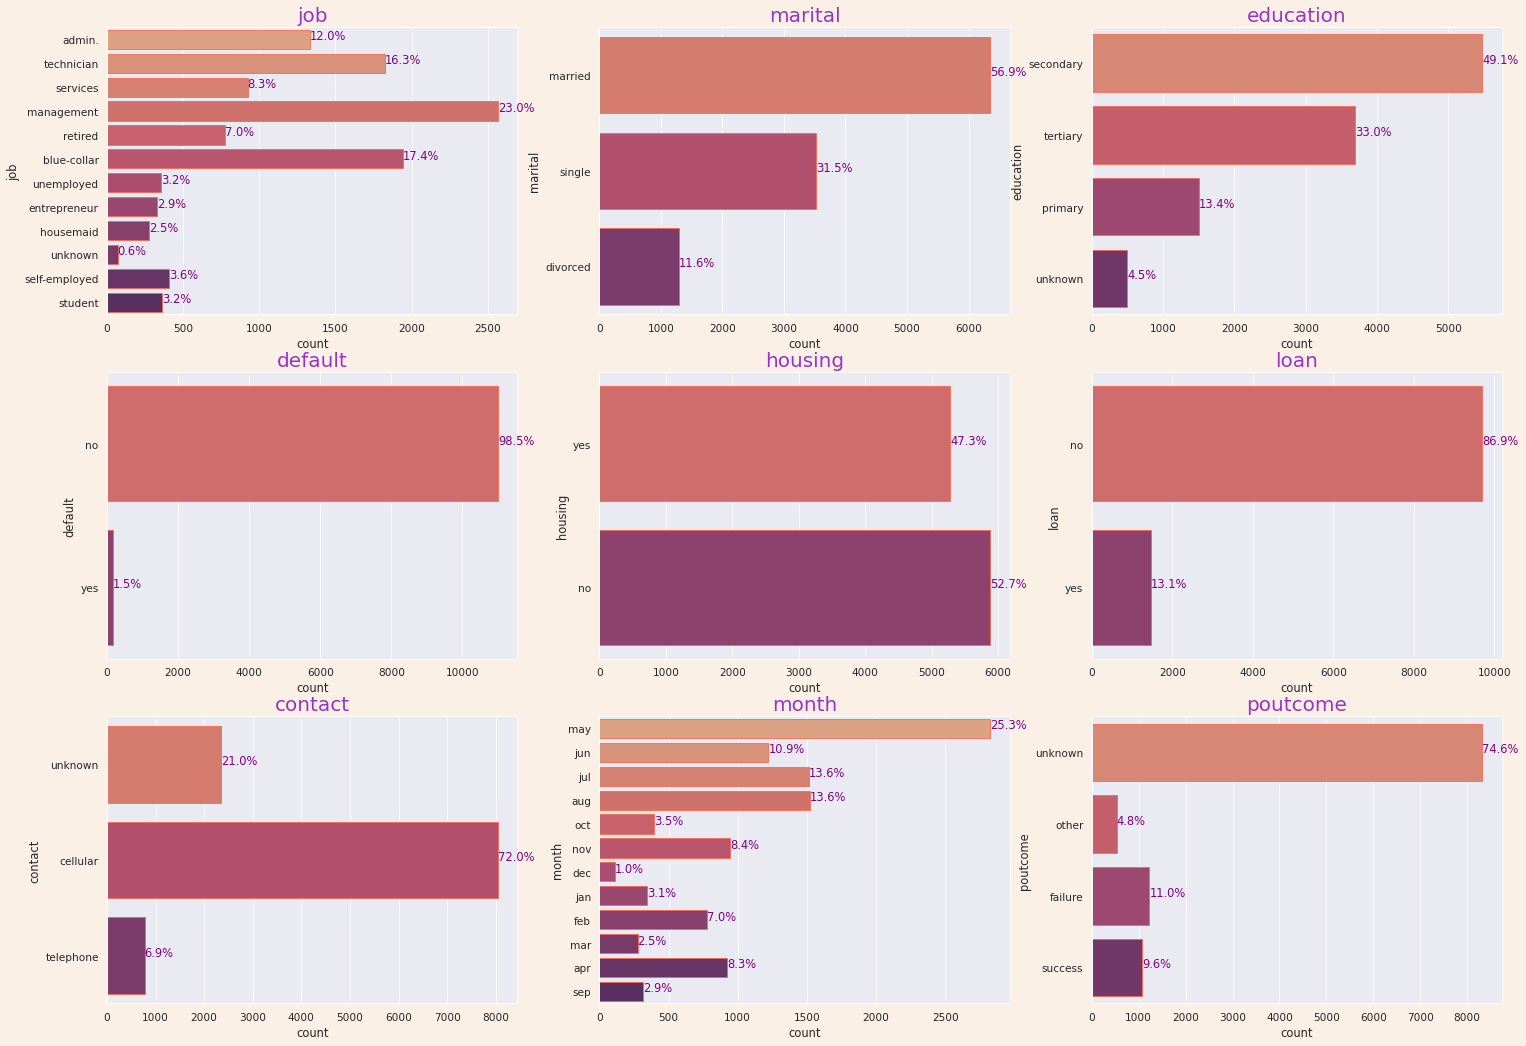

In [105]:
sns.set(style="darkgrid") #white, dark, whitegrid, darkgrid, ticks
# plt.style.use("dark_background")
# viz_dict = {
#     'axes.titlesize':18,
#     'axes.labelsize':16,
sns.set_context("paper", font_scale=1.20)

# sns.set_context("paper")
plt.figure(figsize=(25,75), facecolor='linen')
plotnumber = 1
for cat in categorical_features:
    ax = plt.subplot(12, 3, plotnumber)
    sns.countplot(y= cat, 
                  data= bank, 
                  palette="flare",
                  edgecolor="tomato")
    # plt.xlabel(cat, fontsize=15, c='darkblue')
    # plt.ylabel(cat, fontsize=15, c='darkblue')
    plt.title(cat, fontsize=20, c='darkorchid')
    plotnumber+= 1
    total = len(bank[cat])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y), c="purple")

plt.show()

**Job**: management, blue-collar, technician and adminstration are most relevent, records are high in this dataset and there's a few records of housemaid & unknown job.

**Martial**: there's high records for married clients, and few divorced

**Education**: client whoes education background is secondary are in high numbers

**defualt** there's about 98% of no records in default feature, it seems that it's not an important feature.

**housing**: there's no big diffrence between no(have not a house) and yes(have a house).

**loan**: the majority of people haven't a loan (no class)

**contact**: most of peaple are contacted with cellular

**month**: data in may is high and less in december

**poutcome**: the most are unknown 





####Relationship between Categorical Features and the Traget

In [106]:
features=["marital", "education", "default", "housing", "contact", "month", "loan", "poutcome"]

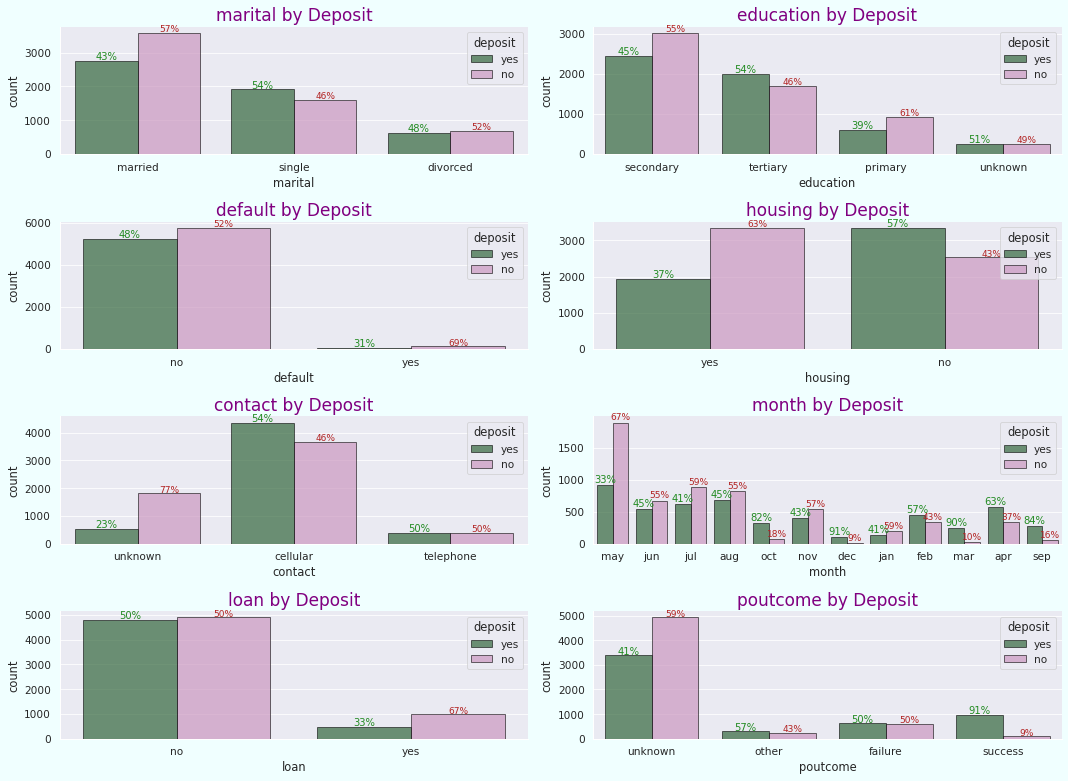

In [107]:
plt.figure(figsize=[15,11], facecolor='azure')
n=1
for col in features:
    ax=plt.subplot(4, 2, n)
    sns.countplot(x= col, 
                  hue= 'deposit', 
                  edgecolor= "black", 
                  alpha= 0.7,
                  palette="cubehelix", 
                  data= bank)
    sns.despine()
    plt.title("{} by Deposit".format(col), c="purple", fontsize=17)
    n= n+1
    # for percentage in graph
    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]

    for left, right in zip(left_bars, right_bars):

        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r

        ax.text(left.get_x() + left.get_width()/2.,
                height_l + 40, 
                '{0:.0%}'.format(height_l/total),
                c="forestgreen",
                # rotation=35,
                fontsize=10,
                ha="center")
        ax.text(right.get_x() + right.get_width()/2., 
                height_r + 40, 
                '{0:.0%}'.format(height_r/total),
                c="firebrick",
                fontsize=9,
                # rotation=30,
                ha="center")
   
plt.tight_layout()
plt.show()
# with_hue(ax, col, 12, 2)



In [108]:
bank.marital.value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [109]:
bank.groupby(['deposit','marital']).size()

deposit  marital 
no       divorced     671
         married     3596
         single      1606
yes      divorced     622
         married     2755
         single      1912
dtype: int64

* There's $6351$ records of married people, but $43$% of theme have made a deposit, and $57$% haven't, also for divorced people, there's not lot's of records but **class no** (`who have not made a deposit`) is greater then **class yes** (`who have made a deposit`), in the contrast, from $3518$ single person $1912$ person have made a deposit $54$% are more then **no class** a little bit.

In [110]:
bank.education.value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [111]:
bank.groupby(['deposit','education']).size()

deposit  education
no       primary       909
         secondary    3026
         tertiary     1693
         unknown       245
yes      primary       591
         secondary    2450
         tertiary     1996
         unknown       252
dtype: int64

* about $54$% of person who have type of education as tritary have made a deposit, is greater then **class no**, also for unknown education but not much records 252 class yes, and 245 no, 
* and for primary and secondary `class no` is greater then `class yes`.

* for default feature: most of people they haven't failure to repay a debt, most of records are no wich mean it's not an important feature, it will affect the accuracy in the modeling

In [112]:
features2=["housing", "contact", "loan", "poutcome"]

In [113]:
for item in features2:
    print(bank[item].value_counts())


no     5881
yes    5281
Name: housing, dtype: int64
cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64
no     9702
yes    1460
Name: loan, dtype: int64
unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64


In [114]:
for i in features2:
    print(bank.groupby(['deposit', i]).size())
# bank[features2].value_counts()

deposit  housing
no       no         2527
         yes        3346
yes      no         3354
         yes        1935
dtype: int64
deposit  contact  
no       cellular     3673
         telephone     384
         unknown      1816
yes      cellular     4369
         telephone     390
         unknown       530
dtype: int64
deposit  loan
no       no      4897
         yes      976
yes      no      4805
         yes      484
dtype: int64
deposit  poutcome
no       failure      610
         other        230
         success       93
         unknown     4940
yes      failure      618
         other        307
         success      978
         unknown     3386
dtype: int64



* client who has housing loan seems to be not interested much on deposit $63$% of theme haven't made a deposit but person who have not a house most of theme are intersted.

* client contacted by cellular $54$% of theme made a deposit and most of unknow are intersted also, but there's lots of records of client with cellular.

* most of client have not a loan and $50$% of theme are intersted in deposit, but clients who have a loan before, they are not many and most of theme they have not made a deposit about $67$% from 1460.


* in **poutcome** (pre campaign outcome) there's lots of records about unknown and not many about the others and so on ..., but if **poutcome = `success`** then, there is high chance of client to show interest on deposit about $91$%



In [115]:
bank.month.value_counts()

may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64

In [116]:
grouped_df = bank.groupby(['month', 'deposit'])
type(grouped_df)

pandas.core.groupby.generic.DataFrameGroupBy

In [117]:
t = pd.DataFrame(grouped_df.size().reset_index(name = "Amount"))

In [118]:
t

,month,deposit,Amount
0,apr,no,346
1,apr,yes,577
2,aug,no,831
3,aug,yes,688
4,dec,no,10
5,dec,yes,100
6,feb,no,335
7,feb,yes,441
8,jan,no,202
9,jan,yes,142


In [119]:
t.style.background_gradient(cmap="PuRd").set_precision(2).highlight_min(axis=0, color='cyan').highlight_max(axis=0, color='darkblue')

,month,deposit,Amount
0,apr,no,346
1,apr,yes,577
2,aug,no,831
3,aug,yes,688
4,dec,no,10
5,dec,yes,100
6,feb,no,335
7,feb,yes,441
8,jan,no,202
9,jan,yes,142


in **March, September, October and December**, most of client show high interest to deposit

in **may**, records are high but the majority of the clients are not interested in deposit.

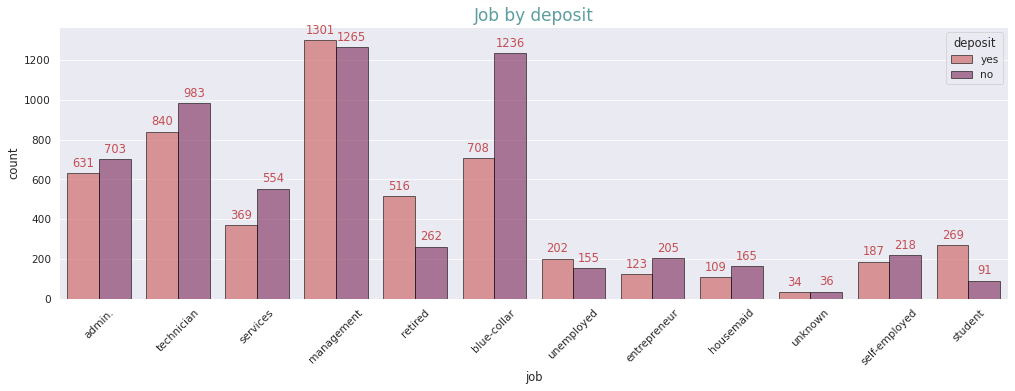

In [120]:

axe = plt.figure(figsize=[17,5])
graph =sns.countplot(x='job', 
              hue='deposit',
              edgecolor="black", 
              alpha=0.7,
              palette="flare", 
              data=bank)

# sns.despine()
plt.title("Job by deposit", c="cadetblue", fontsize=17)

locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
for p in graph.patches: 
    graph.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., 
                    p.get_height()),
                   ha = 'center', 
                   va = 'center', 
                   xytext = (0, 10), 
                   color="r",
                   textcoords = 'offset points') 

plt.show()

#### Retired client has high interest on deposit, and also students, clients who work in managment, there's lots of records of theme but almost equal between class no and class yes, diffrence of about 30 person show intersets on deposit, in the other hand the blue-colloar most of theme show less interest in deposit about $62$% are not intersted on deposit.

# Numerical Features analysis

In [121]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


* From the statistics above, if we compare the q3(75%) and the max value of feature balance, there's a huge diffrence, also duration, compaign, pdays and previuos. there's lot's of outliers maybe.

In [122]:
# list of numerical variables
numeric = [feature for feature in bank.columns if ((bank[feature].dtypes != 'O') & (feature not in ['deposit']))]


In [123]:
numeric

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [124]:
bank[numeric].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       11162 non-null  int64
 1   balance   11162 non-null  int64
 2   day       11162 non-null  int64
 3   duration  11162 non-null  int64
 4   campaign  11162 non-null  int64
 5   pdays     11162 non-null  int64
 6   previous  11162 non-null  int64
dtypes: int64(7)
memory usage: 610.5 KB


- there's no missing values

In [125]:
bank[numeric].head(10)

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0
5,42,0,5,562,2,-1,0
6,56,830,6,1201,1,-1,0
7,60,545,6,1030,1,-1,0
8,37,1,6,608,1,-1,0
9,28,5090,6,1297,3,-1,0


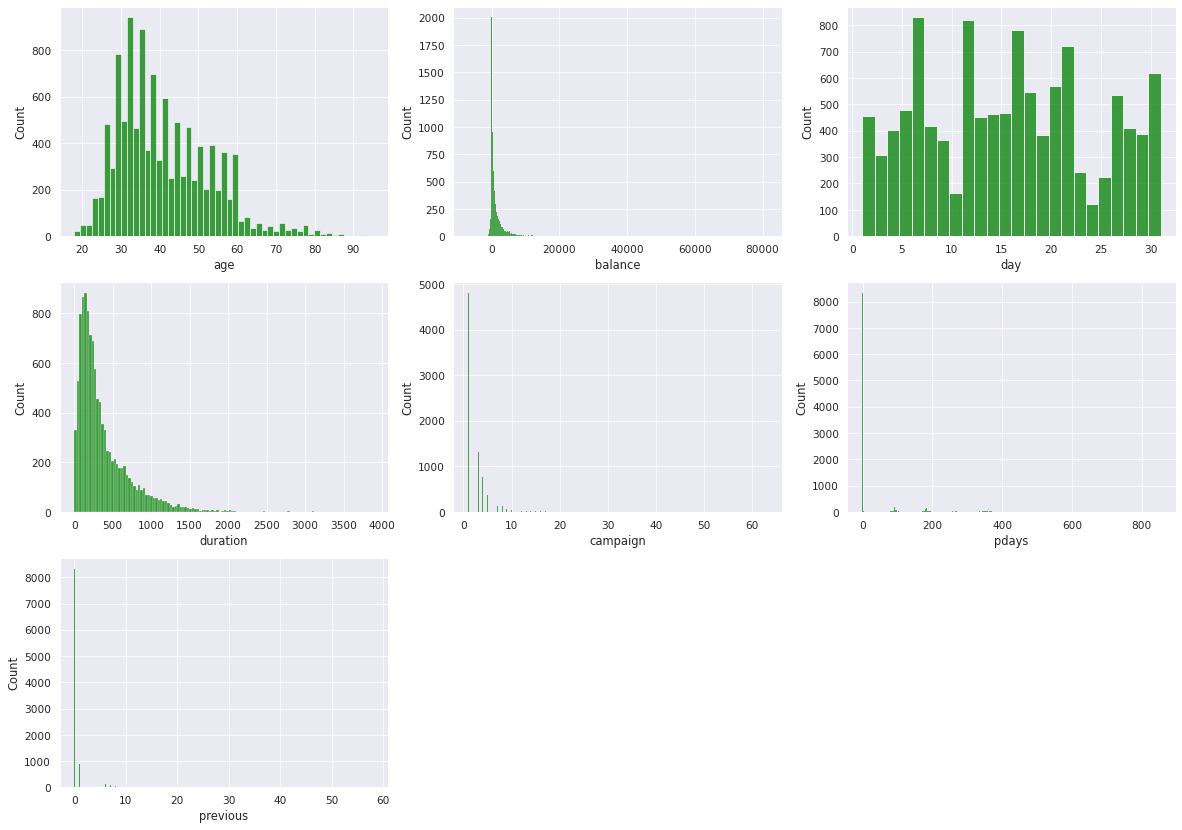

In [126]:
plt.figure(figsize=(20,60))
plotnumber = 1
for nf in numeric:
    ax = plt.subplot(12,3, plotnumber)
    sns.histplot(bank[nf], kde_kws={'linewidth': 5}, color="green")
    plt.xlabel(nf)
    plotnumber+=1
plt.show()

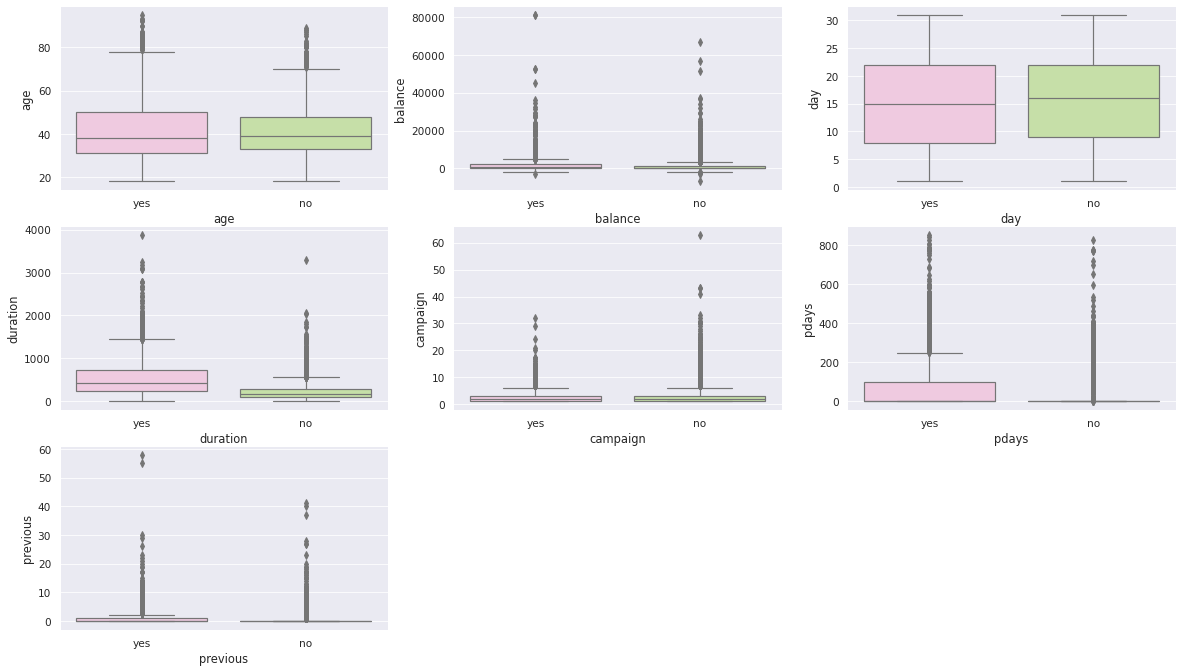

In [127]:
#The target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in numeric:
    ax = plt.subplot(15,3,plotnumber)
    sns.boxplot(x="deposit", 
                y= bank[feature], 
                data=bank, 
                palette="PiYG")
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

In [128]:
for i in numeric:
    print(bank.groupby(['deposit', i]).size())

deposit  age
no       18     1
         19     2
         20     5
         21     8
         22     8
               ..
yes      87     3
         90     2
         92     2
         93     2
         95     1
Length: 144, dtype: int64
deposit  balance
no       -6847      1
         -2712      1
         -2282      1
         -2049      1
         -1965      1
                   ..
yes       34646     1
          36252     1
          45248     1
          52587     2
          81204     2
Length: 5082, dtype: int64
deposit  day
no       1       32
         2      152
         3      128
         4      172
         5      262
               ... 
yes      27     150
         28     143
         29     129
         30     271
         31      46
Length: 62, dtype: int64
deposit  duration
no       2           1
         3           1
         4           2
         5           4
         6           6
                    ..
yes      3094        1
         3102        1
         3183    

In [129]:
#Divide age group
age_group = pd.cut(bank.age, bins = [18,30,50,70,90,120], labels= ['18-29','30-49','50-69','70-89','90+'])
bank.insert(3, 'Age_Group', age_group)
bank.sample(10)

,age,job,marital,Age_Group,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
3767,46,admin.,married,30-49,unknown,no,5511,no,no,cellular,26,jul,414,2,389,1,success,yes
10555,56,management,divorced,50-69,tertiary,no,505,no,no,cellular,9,feb,108,2,199,3,other,no
7043,36,management,single,30-49,tertiary,no,1089,yes,no,unknown,30,may,126,1,-1,0,unknown,no
341,29,blue-collar,single,18-29,secondary,no,908,yes,no,unknown,20,jun,1663,1,-1,0,unknown,yes
8877,38,blue-collar,divorced,30-49,primary,no,-258,yes,no,cellular,14,may,134,2,370,4,other,no
8926,42,technician,married,30-49,secondary,no,9324,no,no,cellular,27,aug,67,4,-1,0,unknown,no
7071,31,management,single,30-49,tertiary,no,0,no,no,cellular,25,aug,9,12,-1,0,unknown,no
425,57,admin.,divorced,50-69,secondary,no,658,no,no,cellular,10,jul,724,1,-1,0,unknown,yes
2764,75,retired,married,70-89,secondary,no,3771,no,no,telephone,16,oct,186,1,183,1,failure,yes
4688,58,services,divorced,50-69,secondary,no,462,no,no,cellular,12,aug,332,1,-1,0,unknown,yes


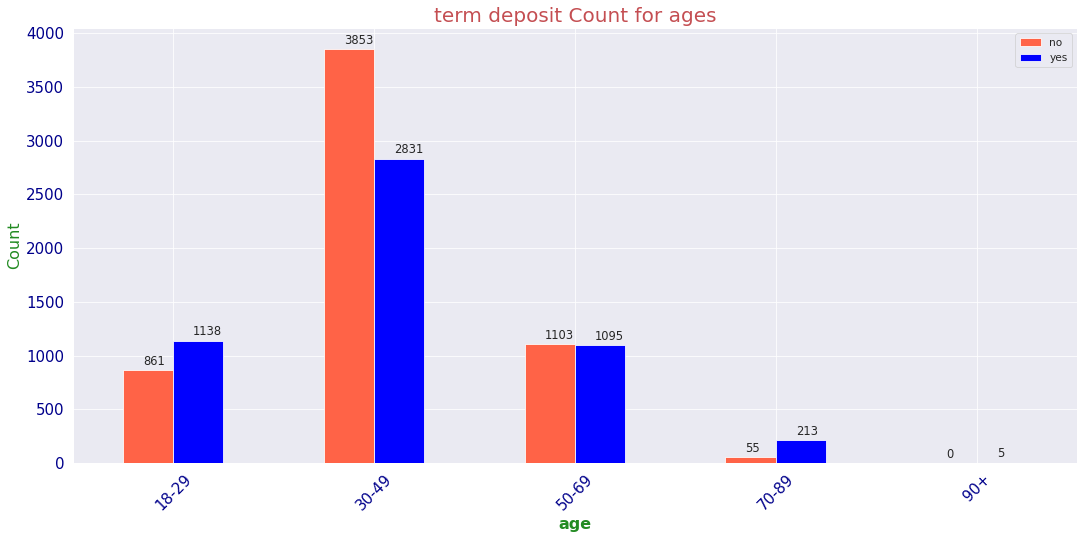

In [130]:
ax=pd.crosstab(bank.Age_Group, bank.deposit).plot(kind="bar",
                                        figsize=(18,8), 
                                        color=['tomato', 'blue'])
plt.legend()
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.title('term deposit Count for ages', fontsize =20, c="r")
plt.xlabel('age', fontsize =16, weight='bold', c="forestgreen")
plt.ylabel('Count', fontsize =16, c="forestgreen")
plt.xticks(fontsize =15, rotation = 45, c="darkblue")
plt.yticks(fontsize =15, c="darkblue")

plt.show()

* Age and Day distribute normaly and the rest are skewed because of the outliers or lack of data
* about the **`AGE`**: Majority of clients are betwwen the age of 25 & 45.
* the youngest ones are intersted by deposit and also the oldes one from 70 to 95 but there's no much records, and between age of 30 and 69 most of theme are not intersted but not to much about $56$%
    * for example here clients between **30-50**: about 58% of theme are not intersted
    

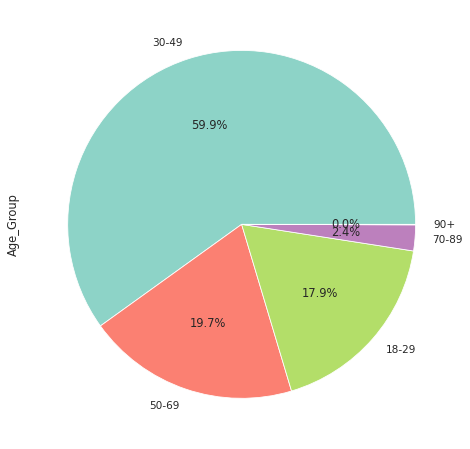

In [131]:
plt.figure(figsize=(16,8))
bank['Age_Group'].value_counts().plot.pie(autopct='%1.1f%%', cmap="Set3");

In [132]:
bank[bank.balance>=45000]

,age,job,marital,Age_Group,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
2468,61,self-employed,divorced,50-69,tertiary,no,52587,no,no,cellular,10,aug,290,1,-1,0,unknown,yes
3043,84,retired,married,70-89,secondary,no,81204,no,no,telephone,28,dec,679,1,313,2,other,yes
3236,61,self-employed,divorced,50-69,tertiary,no,52587,no,no,cellular,15,feb,394,3,189,1,success,yes
3380,84,retired,married,70-89,secondary,no,81204,no,no,telephone,1,apr,390,1,94,3,success,yes
4210,39,technician,single,30-49,unknown,no,45248,yes,no,unknown,6,may,1623,1,-1,0,unknown,yes
8208,52,blue-collar,married,50-69,primary,no,66653,no,no,cellular,14,aug,109,3,-1,0,unknown,no
10143,43,admin.,single,30-49,secondary,no,56831,no,no,unknown,15,may,243,1,-1,0,unknown,no
10585,56,entrepreneur,married,50-69,tertiary,no,51439,no,yes,cellular,8,jul,325,1,-1,0,unknown,no


In [133]:
bank[bank.balance<0]

,age,job,marital,Age_Group,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
17,49,services,married,30-49,secondary,no,-8,yes,no,unknown,8,may,1119,1,-1,0,unknown,yes
23,43,blue-collar,married,30-49,primary,no,-192,yes,no,unknown,8,may,1120,2,-1,0,unknown,yes
30,32,blue-collar,married,30-49,secondary,yes,-1,yes,no,unknown,9,may,653,1,-1,0,unknown,yes
42,45,entrepreneur,divorced,30-49,tertiary,no,-395,yes,no,unknown,13,may,470,1,-1,0,unknown,yes
59,57,technician,married,50-69,tertiary,no,-1,no,no,unknown,14,may,850,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11119,39,management,married,30-49,tertiary,no,-974,no,yes,cellular,13,aug,130,4,-1,0,unknown,no
11120,50,management,married,30-49,tertiary,no,-516,yes,no,unknown,15,may,226,2,-1,0,unknown,no
11132,32,blue-collar,married,30-49,secondary,no,-325,yes,yes,unknown,21,may,171,1,-1,0,unknown,no
11145,60,retired,divorced,50-69,tertiary,no,-134,no,no,cellular,12,may,243,1,271,4,failure,no


In [134]:
def impute(col):
    if col < 0:
        return "< 0"
    if col >= 0 and col <= 10000:
        return " 0 - 10 000 "
    
    if col > 10000:
        return ">10 000 - 81 300"

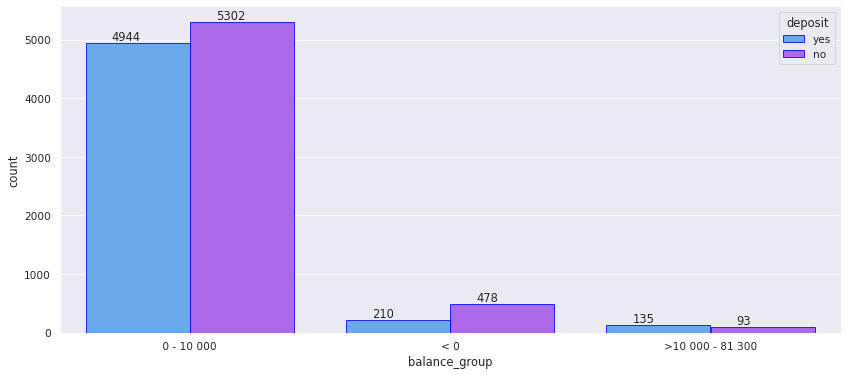

In [135]:
bank['balance_group'] = bank['balance'].apply(impute)
plt.figure(figsize = (14, 6))

ax = sns.countplot(x='balance_group', 
                   hue = 'deposit',
                   palette="cool",
                   edgecolor="blue",
                   data = bank);
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))


* Most of clients have a bank balance less then $10 000 $ but about $48$% of them are intersted in deposit.
* about 600 of clients have a negative blance and few of them have an interest about bank deposit
* few of clients have balance greater then 10000 and about $60$% of them are interseted by bank deposit.


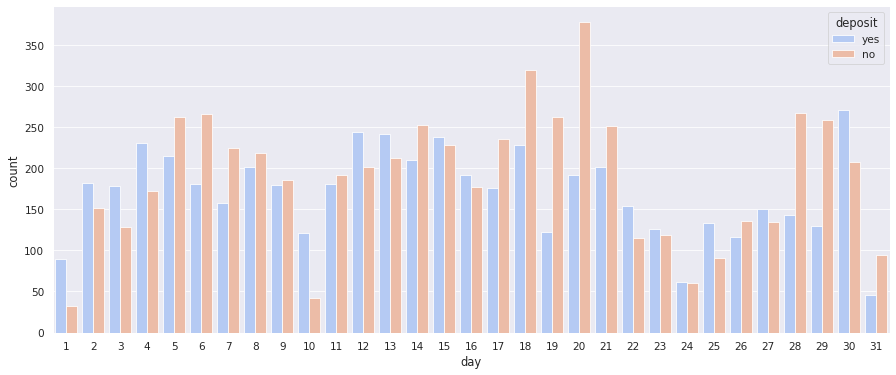

In [136]:
plt.figure(figsize = (15, 6))
sns.countplot(x='day', 
              hue = 'deposit', 
              palette='coolwarm',
              data = bank);

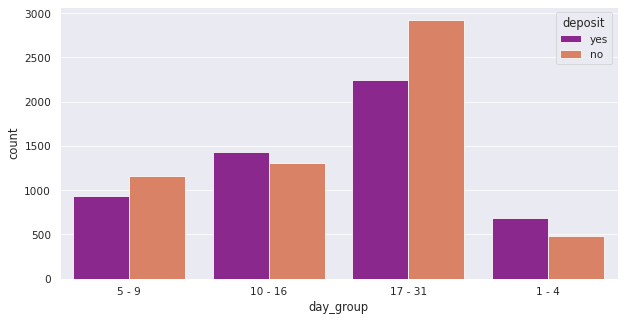

In [137]:
bank["day_group"] = np.nan
bank.loc[bank['day'] <5, 'day_group'] = '1 - 4'
bank.loc[(bank['day'] >=5) & (bank['day'] <=9), 'day_group'] = '5 - 9'
bank.loc[(bank['day'] >=10) & (bank['day'] <=16), 'day_group'] = '10 - 16'

bank.loc[(bank['day'] >=17), 'day_group'] = '17 - 31'
plt.figure(figsize=(10,5))
sns.countplot(x="day_group",
              hue="deposit",
              palette="plasma",
              edgecolor="w",
              data=bank)
plt.show()

* most customers are contacted within the last 15 days of the month, but most of theme show no intrest in deposit, unlike client contacted in the first days of month 

In [138]:
bank.duration.value_counts()

97      39
161     38
158     37
150     37
119     37
        ..
1211     1
1195     1
1139     1
1107     1
2053     1
Name: duration, Length: 1428, dtype: int64

In [139]:
bank['duration'].value_counts(bins=3)

(-1.88, 1295.0]     10876
(1295.0, 2588.0]      273
(2588.0, 3881.0]       13
Name: duration, dtype: int64

In [140]:
def time(t):
    if t < 600:
        return 'less then 10 minutes'
    
    if t > 600:
        return 'greater then 10 minutes'
bank['duration_count'] = bank['duration'].apply(time)

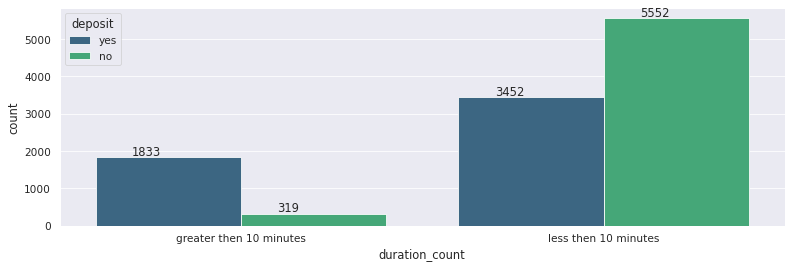

In [141]:

plt.figure(figsize = (13, 4))
ax = sns.countplot(x='duration_count', 
              hue = 'deposit', 
              palette="viridis",
              data = bank);
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

* the majority of clients contacted have a duration call less then 10 minutes but just about 38 % of theme are interested by deposit.
* in the contrast, Customers who are on the phone longer than 10 minutes are interested in deposit ($85$%). but they are not many as person who have a duration call of 10 mins or less.

In [142]:
bank[bank.duration<0]

,age,job,marital,Age_Group,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,balance_group,day_group,duration_count


In [143]:
categorical_val = []
continous_val = []
for column in bank.columns:
    print('*'*30)
    print(f"{column} : {bank[column].unique()}")
    if len(bank[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

******************************
age : [59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]
******************************
job : ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
******************************
marital : ['married' 'single' 'divorced']
******************************
Age_Group : ['50-69', '30-49', '18-29', '70-89', '90+', NaN]
Categories (5, object): ['18-29' < '30-49' < '50-69' < '70-89' < '90+']
******************************
education : ['secondary' 'tertiary' 'primary' 'unknown']
******************************
default : ['no' 'yes']
******************************
balance : [2343   45 1270 ... 1594 2593 -134]
******************************
housing : ['yes' 'no']
******************************
lo

In [144]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [145]:
bank.campaign.unique()

array([ 1,  2,  3,  4,  6,  5,  8, 11,  9, 10, 15, 12, 14,  7, 24, 13, 17,
       29, 21, 20, 16, 32, 19, 25, 22, 43, 18, 41, 63, 27, 30, 26, 23, 28,
       33, 31])

In [146]:
bank.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
         33             1
         41             1
         43             2
         63             1
yes      1           2561
         2          

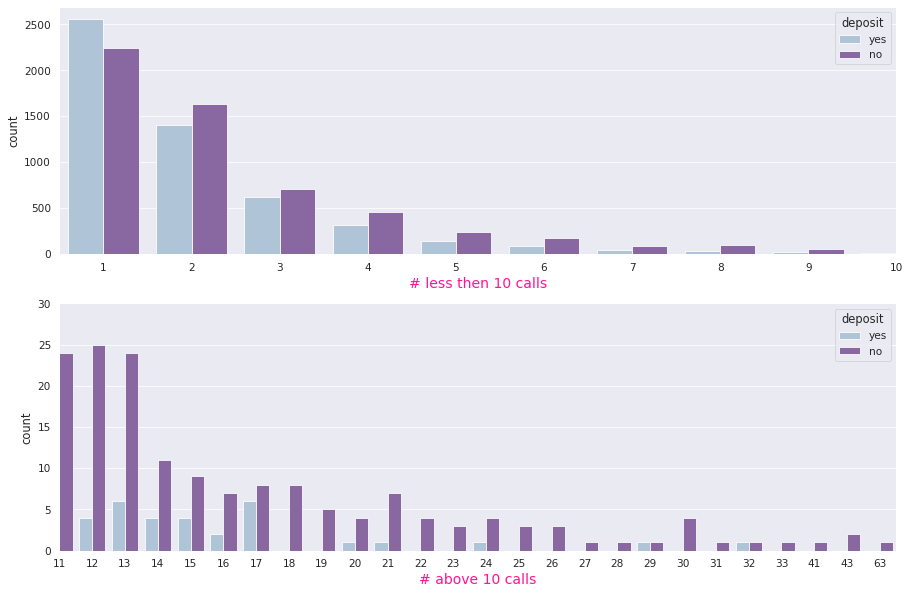

In [147]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
sns.countplot(x='campaign', 
              hue='deposit',
              palette="BuPu",
              data=bank)
plt.xlim(right=9)
plt.xlabel('# less then 10 calls', 
           fontsize=14,
           c="deeppink")

plt.subplot(2, 1, 2)
sns.countplot(x='campaign', 
              hue='deposit', 
              palette="BuPu",
              data=bank)
plt.xlim(left=10)
plt.ylim(top=30)
plt.xlabel('# above 10 calls', 
           fontsize=14,
           c="deeppink")
plt.show()

* most of clients are called less then 5 times during the campaign
* When a client was called more than five times the likelihood to make a deposit is low, After the third call the probability that a client will refuse to suscribe a term deposit increases.

In [148]:
bank[bank.campaign>32]

,age,job,marital,Age_Group,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,balance_group,day_group,duration_count
6927,51,blue-collar,married,50-69,unknown,no,41,yes,no,telephone,9,jul,16,43,-1,0,unknown,no,0 - 10 000,5 - 9,less then 10 minutes
7139,42,blue-collar,married,30-49,primary,no,170,yes,no,unknown,19,may,51,41,-1,0,unknown,no,0 - 10 000,17 - 31,less then 10 minutes
7240,33,blue-collar,married,30-49,secondary,no,0,yes,yes,cellular,31,jul,16,43,-1,0,unknown,no,0 - 10 000,17 - 31,less then 10 minutes
7635,45,management,married,30-49,unknown,no,9051,yes,no,unknown,19,may,124,63,-1,0,unknown,no,0 - 10 000,17 - 31,less then 10 minutes
9683,49,services,divorced,30-49,secondary,no,933,no,yes,cellular,29,jul,92,33,-1,0,unknown,no,0 - 10 000,17 - 31,less then 10 minutes


* i think that campaign greater then 32 are outliers or mistakes.

In [149]:
bank.groupby(['deposit','pdays'],sort=True)['pdays'].count()

deposit  pdays
no       -1       4940
          1          2
          2          6
          5          2
          6          2
                  ... 
yes       804        1
          805        1
          828        1
          842        1
          854        1
Name: pdays, Length: 732, dtype: int64

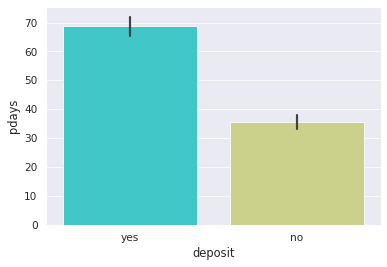

In [150]:
sns.barplot(y=bank['pdays'],
            x=bank['deposit'], 
            palette="rainbow");

In [151]:
bank['pdays'].value_counts()

-1      8324
 92      106
 182      89
 91       84
 181      81
        ... 
 587       1
 579       1
 515       1
 491       1
 683       1
Name: pdays, Length: 472, dtype: int64

there's $8324$ samples of $(-1)$ from $11162$ which means more than $70$% its affect the modeling after, i'll remove this feature, or change the value of -1 to 0 which mean not previously contacted.

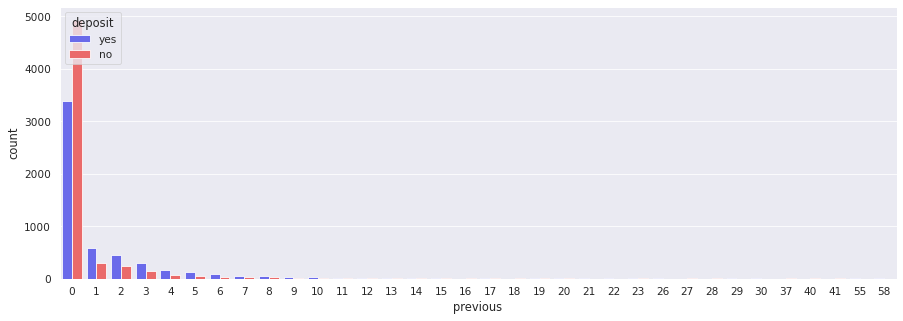

In [152]:
plt.figure(figsize=(15,5))
sns.countplot(x="previous",hue="deposit",data=bank, palette="seismic")
plt.show()

In [153]:
bank['previous'].value_counts()

0     8324
1      887
2      693
3      435
4      244
5      165
6      117
7       77
8       60
9       34
10      30
11      23
12      16
17      11
13      11
14       6
15       5
19       4
16       2
27       2
23       2
20       2
58       1
26       1
18       1
28       1
41       1
21       1
29       1
37       1
40       1
22       1
30       1
55       1
Name: previous, dtype: int64

In [154]:
bank.groupby(['deposit','previous'],sort=True)['previous'].count()

deposit  previous
no       0           4940
         1            304
         2            237
         3            141
         4             73
         5             44
         6             34
         7             23
         8             21
         9             10
         10             4
         11             8
         12             6
         13             2
         14             1
         15             4
         16             2
         17             8
         18             1
         19             2
         20             1
         23             1
         27             2
         28             1
         37             1
         40             1
         41             1
yes      0           3384
         1            583
         2            456
         3            294
         4            171
         5            121
         6             83
         7             54
         8             39
         9             24
         10         

People who subscribed for term deposit tend to have fewer number of contacts performed before this campaign and for this client.

In [155]:
corr = bank.corr()
corr.style.background_gradient(cmap='PuBu')

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000


In [156]:
# change some categoricals variables to numeric binary
bank.deposit = bank.deposit.map({'yes': 1, 'no' : 0}).astype('uint8')
bank.contact = bank.contact.map({'cellular': 1, 'telephone': 0, 'unknown':0}).astype('uint8') 
bank.loan = bank.loan.map({'yes': 1, 'no' : 0}).astype('uint8')
bank.housing = bank.housing.map({'yes': 1, 'no' : 0}).astype('uint8')
bank.default = bank.default.map({'yes': 0,  'no': 1}).astype('uint8')

# pdays feature : replace (-1) with  0 if not contacted previuosly
bank.pdays = bank.pdays.replace(-1, 0)  

#  has contact or not
bank.previous = bank.previous.apply(lambda x: 1 if x > 0 else 0).astype('uint8') 


In [157]:
# Split the other catagorical variable to zeros & ones using LabelEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
job = LabelEncoder().fit_transform(bank['job'])
bank['job'] = job
marital = LabelEncoder().fit_transform(bank['marital'])
bank['marital']= marital
education = LabelEncoder().fit_transform(bank['education'])
bank['education']= education
poutcome = LabelEncoder().fit_transform(bank['poutcome'])
bank['poutcome']= poutcome

In [158]:
bank['month']= bank['month'].map({'jan':1, 
                                  'feb':2,
                                  'mar':3,
                                  'apr':4,
                                  'may':5,
                                  'jun':6,
                                  'jul':7,
                                  'aug':8,
                                  'sep':9,
                                  'oct':10,
                                  'nov':11,
                                  'dec':12
                                  })

In [159]:
bank['month'].value_counts()

5     2824
8     1519
7     1514
6     1222
11     943
4      923
2      776
10     392
1      344
9      319
3      276
12     110
Name: month, dtype: int64

In [160]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             11162 non-null  int64   
 1   job             11162 non-null  int64   
 2   marital         11162 non-null  int64   
 3   Age_Group       11154 non-null  category
 4   education       11162 non-null  int64   
 5   default         11162 non-null  uint8   
 6   balance         11162 non-null  int64   
 7   housing         11162 non-null  uint8   
 8   loan            11162 non-null  uint8   
 9   contact         11162 non-null  uint8   
 10  day             11162 non-null  int64   
 11  month           11162 non-null  int64   
 12  duration        11162 non-null  int64   
 13  campaign        11162 non-null  int64   
 14  pdays           11162 non-null  int64   
 15  previous        11162 non-null  uint8   
 16  poutcome        11162 non-null  int64   
 17  deposit     

In [161]:
bank.poutcome.value_counts()

3    8326
0    1228
2    1071
1     537
Name: poutcome, dtype: int64

In [162]:
bank.job.value_counts()

4     2566
1     1944
9     1823
0     1334
7      923
5      778
6      405
8      360
10     357
2      328
3      274
11      70
Name: job, dtype: int64

In [163]:
bank.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,4.487905,1.199337,1.285164,0.984949,1528.538524,0.473123,0.130801,0.720480,15.658036,6.190826,371.993818,2.508421,52.076151,0.254256,2.477782,0.473840
std,11.913369,3.225132,0.625552,0.749478,0.121761,3225.413326,0.499299,0.337198,0.448783,8.420740,2.572792,347.128386,2.722077,108.399706,0.435461,1.002952,0.499338
min,18.000000,0.000000,0.000000,0.000000,0.000000,-6847.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,1.000000,122.000000,0.000000,0.000000,0.000000,8.000000,5.000000,138.000000,1.000000,0.000000,0.000000,2.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,1.000000,550.000000,0.000000,0.000000,1.000000,15.000000,6.000000,255.000000,2.000000,0.000000,0.000000,3.000000,0.000000
75%,49.000000,7.000000,2.000000,2.000000,1.000000,1708.000000,1.000000,0.000000,1.000000,22.000000,8.000000,496.000000,3.000000,20.750000,1.000000,3.000000,1.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,81204.000000,1.000000,1.000000,1.000000,31.000000,12.000000,3881.000000,63.000000,854.000000,1.000000,3.000000,1.000000


In [164]:
# classify the duration feature 0 if duration call is less than 10 mnute and 1 if not
def time(t):
    if t <= 600:
        return 0
    
    if t > 600:
        return 1
bank['duration'] = bank['duration'].apply(time)

In [165]:
bank.duration.value_counts()

0    9010
1    2152
Name: duration, dtype: int64

In [166]:
# correct the outliers of campaign feature
bank.campaign.unique()

array([ 1,  2,  3,  4,  6,  5,  8, 11,  9, 10, 15, 12, 14,  7, 24, 13, 17,
       29, 21, 20, 16, 32, 19, 25, 22, 43, 18, 41, 63, 27, 30, 26, 23, 28,
       33, 31])

In [167]:
# let's assume that values grater then 32 are mistakes like typos or else ..
bank['campaign'] = np.where((bank.campaign == 43), 23, bank.campaign)
bank['campaign'] = np.where((bank.campaign == 33), 23, bank.campaign)
bank['campaign'] = np.where((bank.campaign == 41), 21, bank.campaign)
bank['campaign'] = np.where((bank.campaign == 63), 23, bank.campaign)

In [168]:
bank.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,4.487905,1.199337,1.285164,0.984949,1528.538524,0.473123,0.130801,0.720480,15.658036,6.190826,0.192797,2.498567,52.076151,0.254256,2.477782,0.473840
std,11.913369,3.225132,0.625552,0.749478,0.121761,3225.413326,0.499299,0.337198,0.448783,8.420740,2.572792,0.394513,2.598658,108.399706,0.435461,1.002952,0.499338
min,18.000000,0.000000,0.000000,0.000000,0.000000,-6847.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,1.000000,122.000000,0.000000,0.000000,0.000000,8.000000,5.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,1.000000,550.000000,0.000000,0.000000,1.000000,15.000000,6.000000,0.000000,2.000000,0.000000,0.000000,3.000000,0.000000
75%,49.000000,7.000000,2.000000,2.000000,1.000000,1708.000000,1.000000,0.000000,1.000000,22.000000,8.000000,0.000000,3.000000,20.750000,1.000000,3.000000,1.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,81204.000000,1.000000,1.000000,1.000000,31.000000,12.000000,1.000000,32.000000,854.000000,1.000000,3.000000,1.000000


In [169]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             11162 non-null  int64   
 1   job             11162 non-null  int64   
 2   marital         11162 non-null  int64   
 3   Age_Group       11154 non-null  category
 4   education       11162 non-null  int64   
 5   default         11162 non-null  uint8   
 6   balance         11162 non-null  int64   
 7   housing         11162 non-null  uint8   
 8   loan            11162 non-null  uint8   
 9   contact         11162 non-null  uint8   
 10  day             11162 non-null  int64   
 11  month           11162 non-null  int64   
 12  duration        11162 non-null  int64   
 13  campaign        11162 non-null  int64   
 14  pdays           11162 non-null  int64   
 15  previous        11162 non-null  uint8   
 16  poutcome        11162 non-null  int64   
 17  deposit     

In [170]:
bank = bank.drop(["Age_Group", "balance_group", "duration_count"],axis=1)

In [171]:
bank = bank.drop(['day_group'], axis=1)

In [172]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int64
 1   job        11162 non-null  int64
 2   marital    11162 non-null  int64
 3   education  11162 non-null  int64
 4   default    11162 non-null  uint8
 5   balance    11162 non-null  int64
 6   housing    11162 non-null  uint8
 7   loan       11162 non-null  uint8
 8   contact    11162 non-null  uint8
 9   day        11162 non-null  int64
 10  month      11162 non-null  int64
 11  duration   11162 non-null  int64
 12  campaign   11162 non-null  int64
 13  pdays      11162 non-null  int64
 14  previous   11162 non-null  uint8
 15  poutcome   11162 non-null  int64
 16  deposit    11162 non-null  uint8
dtypes: int64(11), uint8(6)
memory usage: 1.0 MB


In [173]:
bank.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,4.487905,1.199337,1.285164,0.984949,1528.538524,0.473123,0.130801,0.720480,15.658036,6.190826,0.192797,2.498567,52.076151,0.254256,2.477782,0.473840
std,11.913369,3.225132,0.625552,0.749478,0.121761,3225.413326,0.499299,0.337198,0.448783,8.420740,2.572792,0.394513,2.598658,108.399706,0.435461,1.002952,0.499338
min,18.000000,0.000000,0.000000,0.000000,0.000000,-6847.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,1.000000,122.000000,0.000000,0.000000,0.000000,8.000000,5.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,1.000000,550.000000,0.000000,0.000000,1.000000,15.000000,6.000000,0.000000,2.000000,0.000000,0.000000,3.000000,0.000000
75%,49.000000,7.000000,2.000000,2.000000,1.000000,1708.000000,1.000000,0.000000,1.000000,22.000000,8.000000,0.000000,3.000000,20.750000,1.000000,3.000000,1.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,81204.000000,1.000000,1.000000,1.000000,31.000000,12.000000,1.000000,32.000000,854.000000,1.000000,3.000000,1.000000


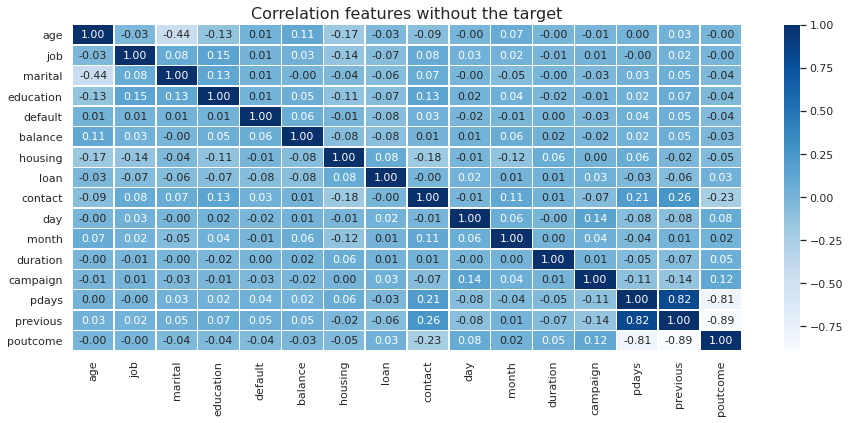

In [174]:

bank1 =bank.drop(['deposit'], axis=1)

sns.set()
f,ax = plt.subplots(figsize=(15, 6))
sns.heatmap(bank1.corr(), 
            annot=True, 
            fmt=".2f", 
            linewidths=.5,
            annot_kws={'size': 11}, 
            ax=ax, cmap=plt.cm.Blues)
 
plt.title("Correlation features without the target", fontsize = 16)

plt.show()


In [175]:
colors=['#8BC7F7', '#46B3F3', '#009FEF', '#008CEE', '#8BC7F7', '#009FEF',  
        '#750985', '#C83D95', '#0078ED', '#FE6DB6', '#8BC7F7', '#0641C8', 
        '#C83D95', '#3049AD','#3049AD','#C83D95','#0B31A5'
        ]

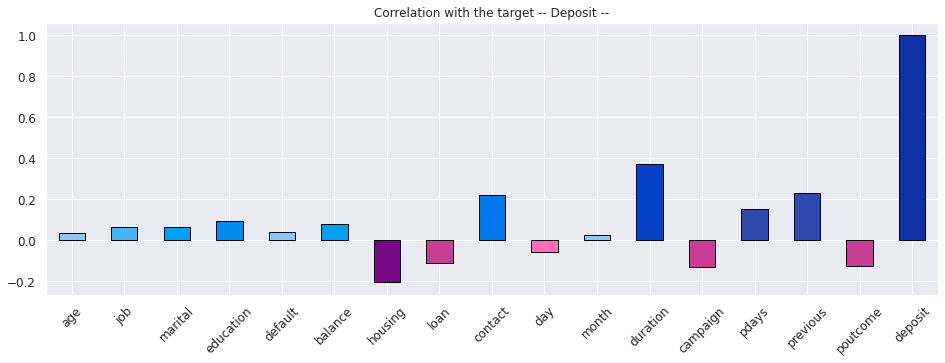

In [176]:

bank.corrwith(bank.deposit).plot.bar(figsize = (16, 5), 
                                     title = "Correlation with the target -- Deposit --", 
                                     fontsize = 12,
                                     color=colors,
                                     edgecolor='black',
                                     rot = 45, 
                                     grid = True);

#### Notes:

* deposit and duration are positively correlated with each other.
* there is a negative corelation between **housing** and ***deposit*** and also with features **loan**, **day**, **campaing**, **poutcome** and the target ***deposit***.
* pdays (number of days that passed since last contact in previous campaign) and previous (number of contacts performed before this campaign) are strongly correlated with each other, as they both related to previous campaign experience. and both have mild, postivie correalation with deposit.
* there's also a mild positive correlation between contact and deposit.
* the rest of features **(age, job, martial, education, default and balance)** have a little bit positive correlation with the target.


# Preprocessing

In [177]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [178]:
#select the training columns
training_cols = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']
#Select the target
y_column = ['deposit']

In [179]:
x = bank[training_cols]
y = bank[y_column]

### Splitting the data

In [180]:
#build a training  / testing set 
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [181]:
x_train.shape, y_train.shape

((8929, 16), (8929, 1))

In [182]:
x_test.shape, y_test.shape

((2233, 16), (2233, 1))

In [183]:
print(x_train)

       age  job  marital  education  ...  campaign  pdays  previous  poutcome
3955    28    8        2          2  ...         5    200         1         0
11150   34    4        1          1  ...         3      0         0         3
5173    48   10        0          1  ...         1     91         1         2
3017    53    2        1          2  ...         1      0         0         3
2910    53    4        1          2  ...         3     97         1         2
...    ...  ...      ...        ...  ...       ...    ...       ...       ...
5734    47    4        1          2  ...         2      0         0         3
5191    28    6        2          2  ...         2     33         1         2
5390    35    9        1          1  ...        13      0         0         3
860     51    5        1          2  ...         5      0         0         3
7270    30    4        2          2  ...         1      0         0         3

[8929 rows x 16 columns]


In [184]:
print(x_test)

       age  job  marital  education  ...  campaign  pdays  previous  poutcome
5527    65    5        0          1  ...         1      0         0         3
4541    38    1        1          1  ...         9      0         0         3
1964    35    1        2          1  ...         1    300         1         0
5007    47    1        1          1  ...         2      0         0         3
8928    35    9        1          2  ...         3      0         0         3
...    ...  ...      ...        ...  ...       ...    ...       ...       ...
376     46   10        1          1  ...         5      0         0         3
5544    49    9        1          0  ...         1      0         0         3
10749   53    9        1          2  ...         1    328         1         0
3881    48   10        1          1  ...         2    178         1         2
6786    34    0        1          2  ...         1    521         1         0

[2233 rows x 16 columns]


In [185]:
print(y_test)

       deposit
5527         0
4541         1
1964         1
5007         1
8928         0
...        ...
376          1
5544         0
10749        0
3881         1
6786         0

[2233 rows x 1 columns]


In [186]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  
scaler.fit(x)
x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)

In [187]:
print(x_test)

[[ 1.99516331  0.15878965 -1.91733074 ... -0.48043012 -0.58390226
   0.52070456]
 [-0.27129961 -1.08152529 -0.31867191 ... -0.48043012 -0.58390226
   0.52070456]
 [-0.52312883 -1.08152529  1.27998692 ...  2.28722903  1.71261538
  -2.47059976]
 ...
 [ 0.98784645  1.39910458 -0.31867191 ...  2.54554389  1.71261538
  -2.47059976]
 [ 0.5681311   1.70918331 -0.31867191 ...  1.16171431  1.71261538
  -0.47639688]
 [-0.6070719  -1.39160402 -0.31867191 ...  4.32607128  1.71261538
  -2.47059976]]


# Modeling:

In [190]:
model = Sequential()
model.add(Dense(10, input_dim=16, activation='tanh'))

model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                170       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [191]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [192]:
x_train_keras = np.array(x_train)
y_train_keras = np.array(y_train)

y_train_keras = y_train_keras.reshape(y_train_keras.shape[0], 1)

In [193]:
model.fit(np.array(x_train_keras), 
          np.array(y_train_keras), 
          epochs=10, 
          batch_size=128, 
          shuffle=True)

Epoch 1/10
70/70 [==============================] - 1s 1ms/step - loss: 0.7497 - accuracy: 0.5228
Epoch 2/10
70/70 [==============================] - 0s 2ms/step - loss: 0.6474 - accuracy: 0.6233
Epoch 3/10
70/70 [==============================] - 0s 1ms/step - loss: 0.5870 - accuracy: 0.6894
Epoch 4/10
70/70 [==============================] - 0s 2ms/step - loss: 0.5518 - accuracy: 0.7243
Epoch 5/10
70/70 [==============================] - 0s 2ms/step - loss: 0.5310 - accuracy: 0.7427
Epoch 6/10
70/70 [==============================] - 0s 1ms/step - loss: 0.5187 - accuracy: 0.7515
Epoch 7/10
70/70 [==============================] - 0s 2ms/step - loss: 0.5112 - accuracy: 0.7583
Epoch 8/10
70/70 [==============================] - 0s 2ms/step - loss: 0.5068 - accuracy: 0.7618
Epoch 9/10
70/70 [==============================] - 0s 2ms/step - loss: 0.5037 - accuracy: 0.7656
Epoch 10/10
70/70 [==============================] - 0s 1ms/step - loss: 0.5016 - accuracy: 0.7659


# Test the accuracy and the loss function

In [194]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f'{score[1]*100:.2f} % Accuracy on the Test set')
print('The Loss = : {:.2f}'.format(score[0]))

76.85 % Accuracy on the Test set
The Loss = : 0.50


In [195]:
score2 = model.evaluate(x_test, y_test, verbose=0, batch_size=128)
print(f'{score2[1]*100:.2f} % Accuracy on the Test set')
print('The Loss = : {:.2f}'.format(score2[0]))

76.85 % Accuracy on the Test set
The Loss = : 0.50


####Trying another Model with little changing in hyperparameters and ading layers

In [222]:
# Initialize the constructor
model2 = Sequential()

# Add an input layer 
model2.add(Dense(12, activation='elu', input_shape=(16,)))

# Add one hidden layer 
model2.add(Dense(8, activation='relu'))
model2.add(Dense(8, activation='relu'))
# Add an output layer 
model2.add(Dense(1, activation='sigmoid'))

In [223]:
# Model output shape
model2.output_shape

# Model summary
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 12)                204       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 389
Trainable params: 389
Non-trainable params: 0
_________________________________________________________________


In [241]:
model2.compile(loss='binary_crossentropy',
              optimizer='RMSProp',
              metrics=['accuracy'])
                   
model2.fit(x_train, 
           y_train,
           epochs=20, 
           batch_size=5, 
           verbose=1)

Epoch 1/20
1786/1786 [==============================] - 3s 1ms/step - loss: 0.4367 - accuracy: 0.8274
Epoch 2/20
1786/1786 [==============================] - 3s 1ms/step - loss: 0.4381 - accuracy: 0.8262
Epoch 3/20
1786/1786 [==============================] - 3s 1ms/step - loss: 0.4374 - accuracy: 0.8279
Epoch 4/20
1786/1786 [==============================] - 3s 1ms/step - loss: 0.4367 - accuracy: 0.8281
Epoch 5/20
1786/1786 [==============================] - 3s 1ms/step - loss: 0.4363 - accuracy: 0.8303
Epoch 6/20
1786/1786 [==============================] - 3s 1ms/step - loss: 0.4398 - accuracy: 0.8304
Epoch 7/20
1786/1786 [==============================] - 3s 2ms/step - loss: 0.4397 - accuracy: 0.8291
Epoch 8/20
1786/1786 [==============================] - 3s 1ms/step - loss: 0.4382 - accuracy: 0.8298
Epoch 9/20
1786/1786 [==============================] - 3s 1ms/step - loss: 0.4389 - accuracy: 0.8272
Epoch 10/20
1786/1786 [==============================] - 3s 1ms/step - loss: 0.440

# accuracy & loss

In [243]:
scor = model2.evaluate(x_test, y_test, verbose=0, batch_size=128)
print(f'{scor[1]*100:.2f} % Accuracy on the Test set')
print('The Loss = : {:.2f}'.format(scor[0]))

81.55 % Accuracy on the Test set
The Loss = : 0.47


# Confusion matrix

In [244]:
pred = model2.predict(x_test)

In [245]:
print(pred)

[[0.69666874]
 [0.82253504]
 [0.21598777]
 ...
 [0.22913146]
 [0.9721917 ]
 [0.8033707 ]]


In [246]:
for i in range(len(pred)):
    if pred[i] > 0.75:
        pred[i] = 1
    else:
        pred[i] = 0

In [247]:
print(pred, type(pred))

[[0.]
 [1.]
 [0.]
 ...
 [0.]
 [1.]
 [1.]] <class 'numpy.ndarray'>


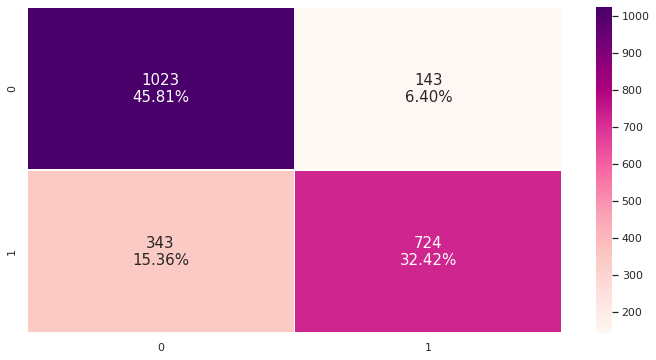

In [248]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
# sns.heatmap(cm/np.sum(cm), annot=True, 
#             fmt='.2%', cmap='RdPu');
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize = (12,6))
sns.heatmap(cm, 
            annot=labels, 
            fmt='', 
            cmap='RdPu',
            annot_kws={"size": 15}, 
            linewidths=.8);
# sns.heatmap(cm, annot=True);

* Got good result for True positive about (`45`%) and  True Negative about (`32`%), the model is **aprox.77%** accurate, the rest is inaccurately predicted (about 20%)

#### Report

In [249]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81      1166
           1       0.84      0.68      0.75      1067

    accuracy                           0.78      2233
   macro avg       0.79      0.78      0.78      2233
weighted avg       0.79      0.78      0.78      2233



* Pretty good result: 

    *  precision is pretty in deposit class yes = 84%
    * recall is best in deposit class no = 88% but not to good in class yes = 68%
    * and f1-score is good class yes = 81%
